In [24]:
# import sys
# sys.path.append("/home/jgould/Documents/Bubblewrap/scripts/")
# from optim import evaluate

from ax.storage.json_store.load import load_experiment
import ax
from ax.service.ax_client import AxClient

from ax.plot.scatter import (
    interact_fitted,
    plot_objective_vs_constraints,
    tile_fitted,
)

In [25]:
ax_client = AxClient.load_from_json_file("ax_symmetric_noisy_jpca_defaults_snapshot.json");

[INFO 09-15 11:48:23] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.


In [26]:
df = ax_client.get_trials_data_frame()
df

trial_index arm_name trial_status generation_method  regression_mse  \
0             0      0_0    COMPLETED            Manual       74.720581   
1             1      1_0    COMPLETED            Manual       80.622064   
2             2      2_0    COMPLETED            Manual     3357.652301   
3             3      3_0    COMPLETED            Manual      485.306321   
4             4      4_0    COMPLETED            Manual       70.772286   
..          ...      ...          ...               ...             ...   
93           93     93_0    COMPLETED           BoTorch      535.916751   
94           94     94_0    COMPLETED           BoTorch       64.837476   
95           95     95_0    COMPLETED           BoTorch       62.174061   
96           96     96_0    COMPLETED           BoTorch       60.394165   
97           97     97_0    COMPLETED           BoTorch       61.985968   

     runtime  forgetting_factor  noise_scale  n_perturbations  
0   6.704136           0.000039     0.004390                5  
1   5.983280           0.000014     0.002106                2  
2   5.438951           0.095710     0.001947                2  
3   6.969711           0.034399     0.000124                5  
4   6.084162           0.003263     0.002459                2  
..       ...                ...          ...              ...  
93  6.516969           0.091850     0.237434                1  
94  9.572446           0.001012     0.010517                6  
95  8.830356           0.034698     0.014758                6  
96  7.611288           0.100000     0.064965                6  
97  8.133032           0.051546     0.037221                6  

[98 rows x 9 columns]

In [27]:
df[df.regression_mse < 70]

trial_index arm_name trial_status generation_method  regression_mse  \
5             5      5_0    COMPLETED            Manual       68.430335   
14           14     14_0    COMPLETED            Manual       63.294779   
15           15     15_0    COMPLETED            Manual       64.092789   
16           16     16_0    COMPLETED            Manual       59.988564   
27           27     27_0    COMPLETED            Manual       68.230043   
30           30     30_0    COMPLETED            Manual       64.652578   
33           33     33_0    COMPLETED            Manual       62.789493   
38           38     38_0    COMPLETED            Manual       66.265713   
55           55     55_0    COMPLETED            Manual       63.899855   
63           63     63_0    COMPLETED            Manual       69.893946   
71           71     71_0    COMPLETED            Manual       67.625210   
80           80     80_0    COMPLETED            Manual       65.466219   
85           85     85_0    COMPLETED           BoTorch       65.484212   
88           88     88_0    COMPLETED           BoTorch       65.679839   
89           89     89_0    COMPLETED           BoTorch       66.734589   
90           90     90_0    COMPLETED           BoTorch       62.428248   
92           92     92_0    COMPLETED           BoTorch       66.533990   
94           94     94_0    COMPLETED           BoTorch       64.837476   
95           95     95_0    COMPLETED           BoTorch       62.174061   
96           96     96_0    COMPLETED           BoTorch       60.394165   
97           97     97_0    COMPLETED           BoTorch       61.985968   

      runtime  forgetting_factor  noise_scale  n_perturbations  
5    5.844087           0.001622     0.005514                2  
14   5.733539           0.032833     0.032293                2  
15   6.624675           0.001374     0.013523                3  
16   6.219359           0.046611     0.020671                5  
27   5.930877           0.000179     0.029853                2  
30   6.577768           0.000513     0.012130                3  
33   6.676733           0.042912     0.006427                5  
38   8.320515           0.000026     0.018042                5  
55   6.983456           0.095851     0.718629                3  
63   7.512707           0.018092     0.070951                4  
71   5.873256           0.001263     0.005619                1  
80   5.443454           0.040940     1.000000                1  
85   9.061738           0.011352     0.009776                6  
88   6.165722           0.010860     0.013058                1  
89   7.458409           0.000058     0.014153                1  
90   7.602953           0.022986     0.016937                5  
92  19.079428           0.016575     0.002967                6  
94   9.572446           0.001012     0.010517                6  
95   8.830356           0.034698     0.014758                6  
96   7.611288           0.100000     0.064965                6  
97   8.133032           0.051546     0.037221                6

In [28]:
ax_client.get_next_trial();

[INFO 09-15 11:48:45] ax.service.ax_client: Generated new trial 98 with parameters {'forgetting_factor': 0.1, 'noise_scale': 0.145009, 'n_perturbations': 1}.


In [ ]:
%%time
best_parameters, values = ax_client.get_best_parameters(use_model_predictions=True)
print(f"Best parameters: {best_parameters}")
print(f"Corresponding mean: {values[0]}, covariance: {values[1]}")

Best parameters: {'forgetting_factor': 0.1, 'noise_scale': 0.4329722661575279, 'n_perturbations': 1}
Corresponding mean: {'runtime': 6.054198193826591, 'regression_mse': 59.48787696309205}, covariance: {'runtime': {'runtime': 0.007698631451949265, 'regression_mse': 0.0}, 'regression_mse': {'runtime': 0.0, 'regression_mse': 43.06367938144036}}
CPU times: user 3min 4s, sys: 277 ms, total: 3min 4s
Wall time: 15.9 s


In [41]:
%%time
best_parameters, values = ax_client.get_best_parameters(use_model_predictions=False)
print(f"Best parameters: {best_parameters}")
print(f"Corresponding mean: {values[0]}, covariance: {values[1]}")

Best parameters: {'forgetting_factor': 0.04661068063347157, 'noise_scale': 0.020670801400876786, 'n_perturbations': 5}
Corresponding mean: {'runtime': 6.2193587224, 'regression_mse': 59.9885643233}, covariance: {'runtime': {'runtime': 0.07463547234573727}, 'regression_mse': {'regression_mse': 15.644331731211208}}
CPU times: user 14.9 ms, sys: 7 µs, total: 14.9 ms
Wall time: 14.9 ms


In [30]:
from ax.utils.notebook.plotting import render

In [31]:
pnames = ["forgetting_factor", "noise_scale", "n_perturbations"]

In [46]:
def contour(x, y, z, parameters=best_parameters):
    render(ax.plot.contour.plot_contour(ax_client.generation_strategy.model, x, y, z, slice_values=parameters, lower_is_better=True))

In [47]:
best_parameters = {'forgetting_factor': 1e-3, 'noise_scale': 1e-2, 'n_perturbations': 3}

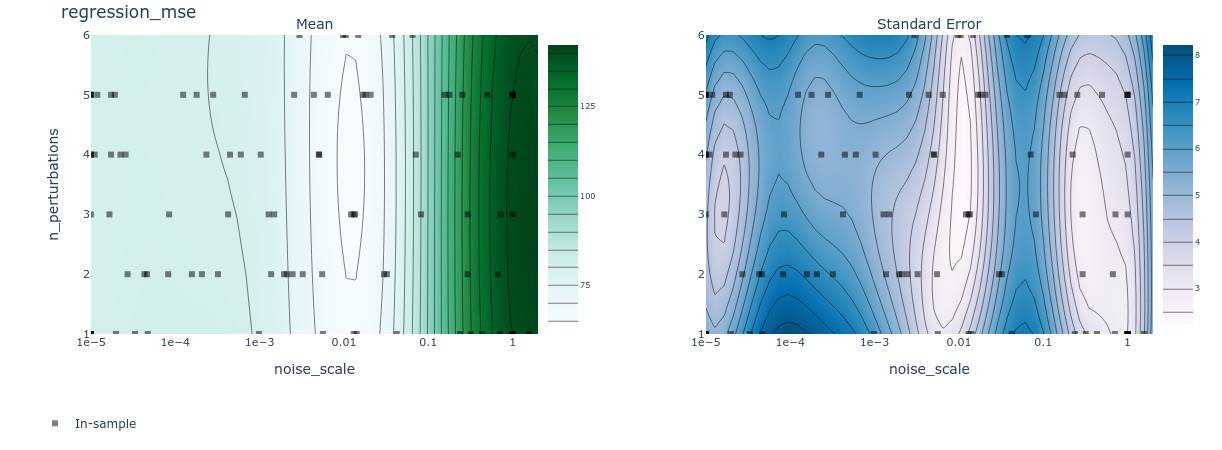

In [51]:
contour(pnames[1], pnames[2], "regression_mse")

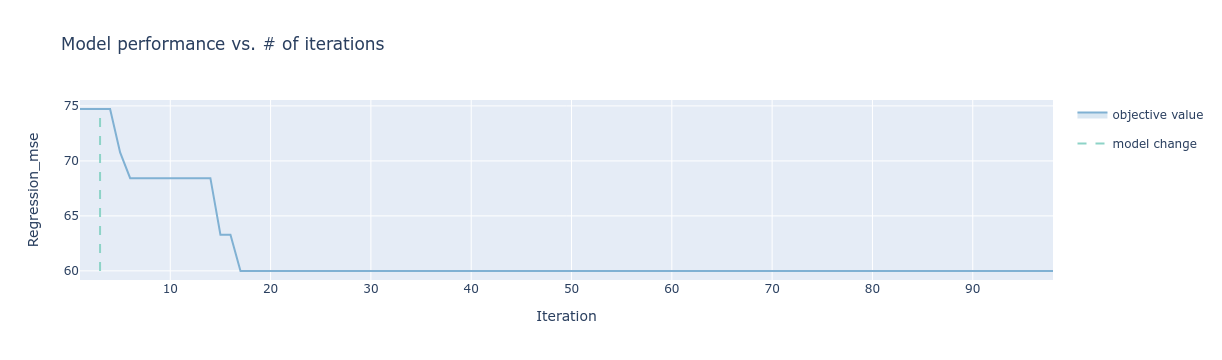

In [35]:
render(ax_client.get_optimization_trace())

In [36]:
from ax.plot.slice import plot_slice

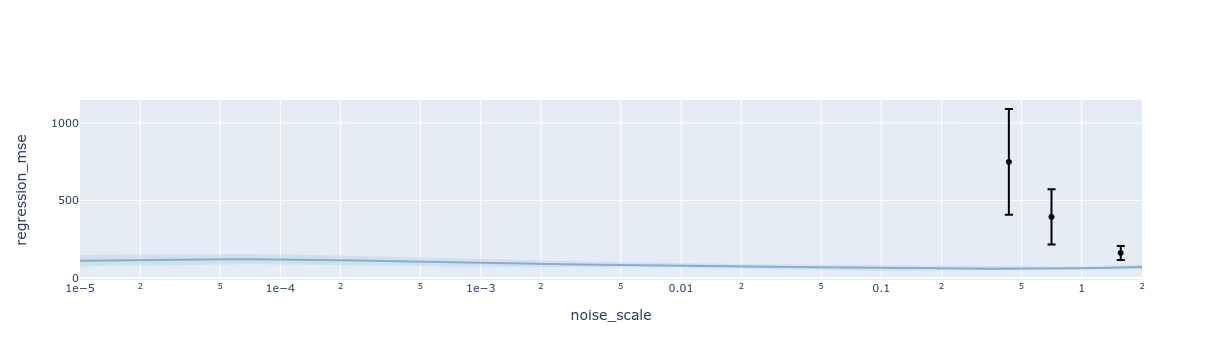

In [37]:
render(plot_slice(ax_client.generation_strategy.model, "noise_scale", "regression_mse", slice_values=best_parameters))

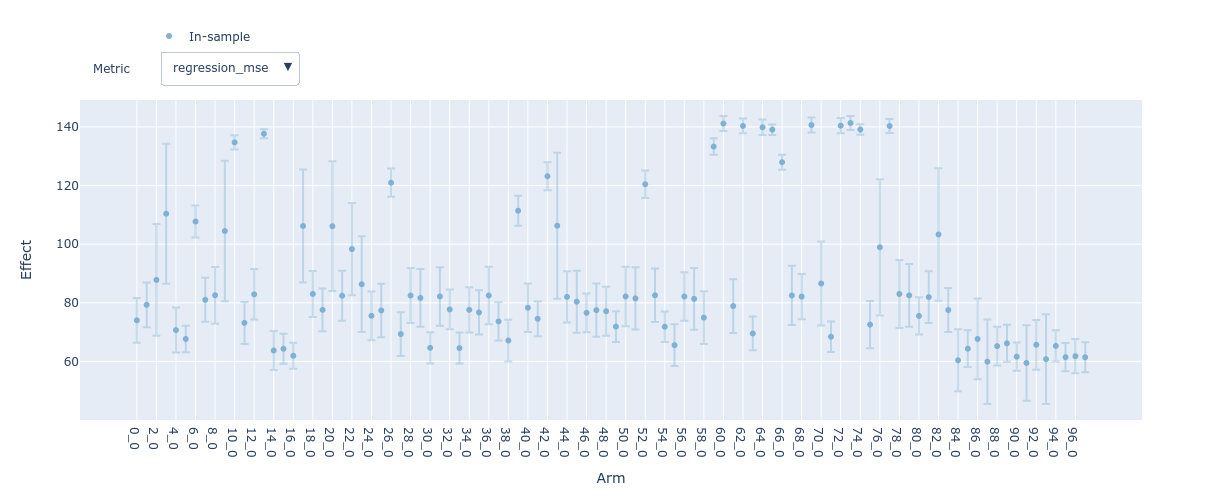

In [38]:
render(interact_fitted(ax_client.generation_strategy.model, rel=False))

# BW Hyperparameters

In [56]:
ax_client = AxClient.load_from_json_file("ax_jpca_bw_params_snapshot.json");

[INFO 09-14 13:30:21] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.


In [57]:
%%time
ax_client.get_next_trial()

KeyboardInterrupt: 

In [52]:
ax_client.generation_strategy.model

In [4]:
df = ax_client.get_trials_data_frame()
df

trial_index arm_name trial_status generation_method  regression_mse  \
0            0      0_0    COMPLETED            Manual       77.927247   
1            1      1_0    COMPLETED            Manual     8705.353744   
2            2      2_0    COMPLETED             Sobol       77.816400   
3            3      3_0    COMPLETED             Sobol       64.664149   

    runtime  forgetting_factor   noise_scale  n_perturbations  
0  6.247336       9.511146e-15  2.724242e-07                2  
1  6.605084       9.166198e-02  2.472867e-04                3  
2  6.217544       2.477175e-18  2.824556e-04                3  
3  6.250073       7.713406e-25  4.375386e-10                1

<Axes: xlabel='bw_pred_error', ylabel='regression_mse'>

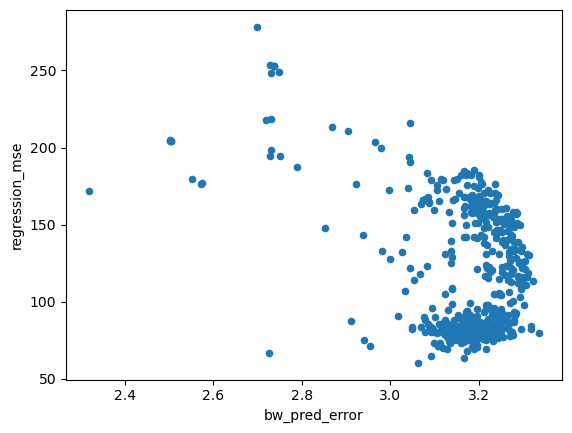

In [10]:
df[df.generation_method == "BoTorch"].plot.scatter("bw_pred_error", "regression_mse")

In [7]:
%%time
best_parameters, values = ax_client.get_best_parameters(use_model_predictions=True)
print(f"Best parameters: {best_parameters}")
print(f"Corresponding mean: {values[0]}, covariance: {values[1]}")

Best parameters: {'forgetting_factor': 7.713405820241335e-25, 'noise_scale': 4.375386240221838e-10, 'n_perturbations': 1}
Corresponding mean: {'runtime': 6.2500729163, 'regression_mse': 64.6641487945}, covariance: {'runtime': {'runtime': 0.03856173423934785}, 'regression_mse': {'regression_mse': 8.44363806025996}}
CPU times: user 12.1 ms, sys: 50 µs, total: 12.1 ms
Wall time: 11.7 ms


In [8]:
from ax.utils.notebook.plotting import render

In [9]:
pnames = ["num", "B_thresh", "lam", "nu", "eps"]

In [24]:
def contour(x, y, z, parameters=best_parameters):
    render(ax.plot.contour.plot_contour(ax_client.generation_strategy.model, x, y, z, slice_values=parameters, lower_is_better=False))

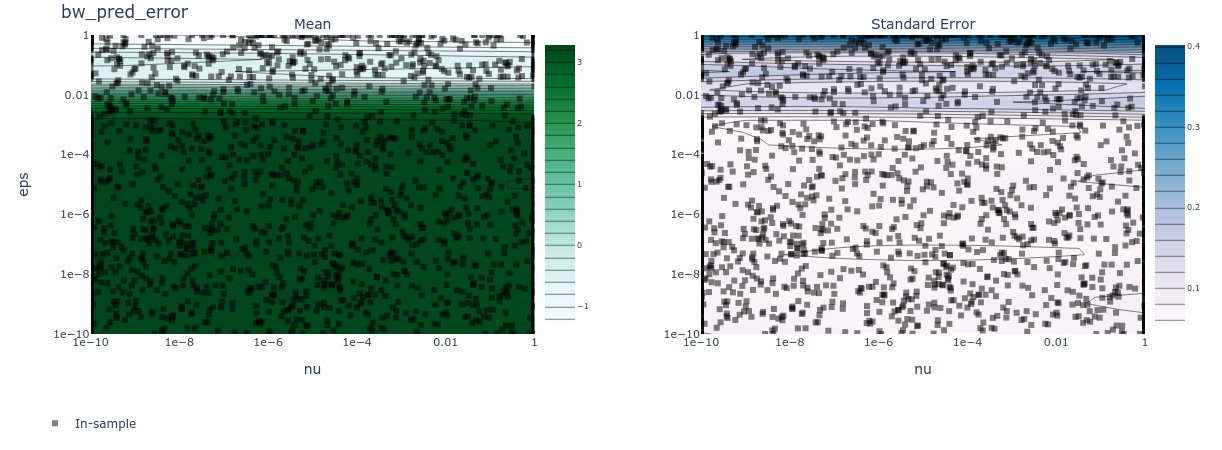

In [78]:
contour(pnames[3], pnames[4], "bw_pred_error")

In [63]:
from ax.core.observation import ObservationFeatures
ax_client.generation_strategy.model.predict([ObservationFeatures({'num': 100,
  'B_thresh': -30.0,
  'lam': 5.367029527424805e-10,
  'nu': 1.0,
  'eps': 0.08125382542882605})])

({'runtime': [7.674763423635952],
  'regression_mse': [245.9519867356346],
  'bw_pred_error': [-8.502056728246092]},
 {'runtime': {'runtime': [0.1225462386811123],
   'regression_mse': [0.0],
   'bw_pred_error': [0.0]},
  'regression_mse': {'runtime': [0.0],
   'regression_mse': [335.6394105076257],
   'bw_pred_error': [0.0]},
  'bw_pred_error': {'runtime': [0.0],
   'regression_mse': [0.0],
   'bw_pred_error': [0.047511885588748894]}})

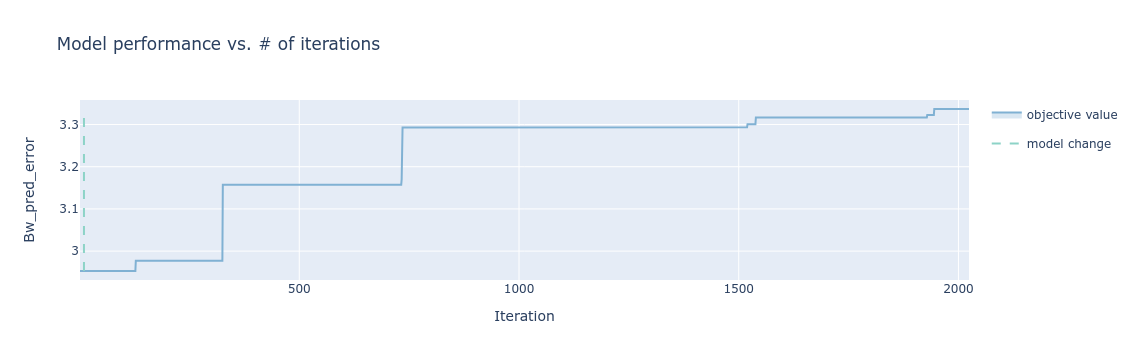

In [52]:
render(ax_client.get_optimization_trace())

In [53]:
from ax.plot.slice import plot_slice

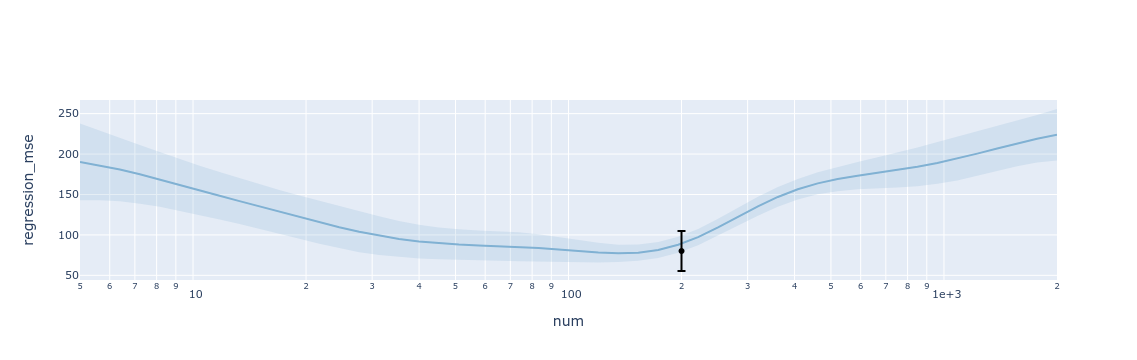

In [59]:
render(plot_slice(ax_client.generation_strategy.model, "num", "regression_mse", slice_values=best_parameters))

In [55]:
render(interact_fitted(ax_client.generation_strategy.model, rel=False))

KeyboardInterrupt: 